# EMAIL SPAM DETECTION

In [3]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

In [4]:
df= pd.read_csv('mail_data.csv')

In [5]:
df


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
data = df.where((pd.notnull(df)), '')

In [7]:
data.head(10)


,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [8]:
data.info


<bound method DataFrame.info of      Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]>

In [9]:
data.shape

(5572, 2)

In [10]:
data.loc[data['Category']=='spam', 'Category',]=0
data.loc[data['Category']=='ham','Category',]=1

In [11]:
X=data['Message']
Y=data['Category']

In [12]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [13]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [14]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state = 3)

In [15]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


In [16]:
print(Y.shape)
print(Y_train.shape)
print(Y_test.shape)

(5572,)
(4457,)
(1115,)


In [17]:
#using input text data as input vectors using TfidfVectroizer 
feature_extraction= TfidfVectorizer(min_df=1, stop_words= 'english', lowercase= True)

X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [18]:
print(X_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [19]:
print(X_train_features)

  (0, 5413)	0.6198254967574347
  (0, 4456)	0.4168658090846482
  (0, 2224)	0.413103377943378
  (0, 3811)	0.34780165336891333
  (0, 2329)	0.38783870336935383
  (1, 4080)	0.18880584110891163
  (1, 3185)	0.29694482957694585
  (1, 3325)	0.31610586766078863
  (1, 2957)	0.3398297002864083
  (1, 2746)	0.3398297002864083
  (1, 918)	0.22871581159877646
  (1, 1839)	0.2784903590561455
  (1, 2758)	0.3226407885943799
  (1, 2956)	0.33036995955537024
  (1, 1991)	0.33036995955537024
  (1, 3046)	0.2503712792613518
  (1, 3811)	0.17419952275504033
  (2, 407)	0.509272536051008
  (2, 3156)	0.4107239318312698
  (2, 2404)	0.45287711070606745
  (2, 6601)	0.6056811524587518
  (3, 2870)	0.5864269879324768
  (3, 7414)	0.8100020912469564
  (4, 50)	0.23633754072626942
  (4, 5497)	0.15743785051118356
  :	:
  (4454, 4602)	0.2669765732445391
  (4454, 3142)	0.32014451677763156
  (4455, 2247)	0.37052851863170466
  (4455, 2469)	0.35441545511837946
  (4455, 5646)	0.33545678464631296
  (4455, 6810)	0.29731757715898277
  (4

Spam detection using Logisitic Regression

In [20]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [21]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [22]:
prediction_on_training_data= model.predict(X_train_features)
accuracy_on_training_data= accuracy_score(Y_train, prediction_on_training_data)

In [23]:
print('Acc on training data:', accuracy_on_training_data)

Acc on training data: 0.9670181736594121


In [24]:
prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [25]:
print('acc on test data: ', accuracy_on_test_data)

acc on test data:  0.9659192825112107


In [26]:
input_your_mail = ["What's Up?"]

input_data_features = feature_extraction.transform(input_your_mail)

prediction = model.predict(input_data_features)

print(prediction)

if(prediction[0]==1):
    print("Ham Mail")
else:
    print("Spam Mail")

[1]
Ham Mail


Classification using ELM

In [39]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold

# Define ELMClassifier
class ELMClassifier:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights
        self.input_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.input_weights)

        # Solve for output weights using pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output) @ y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.input_weights)
        predicted_output = hidden_output @ self.output_weights
        # For binary classification, we can use a threshold (e.g., 0.5)
        return (predicted_output >= 0.5).astype(int)

# Define range of hidden nodes to test
hidden_nodes_range = [50, 100, 150, 200, 250, 500, 1000]

# Initialize variables to store maximum accuracy and corresponding number of hidden nodes
max_accuracy = 0
optimal_hidden_nodes = None

# Iterate over hidden nodes range
for n_hidden in hidden_nodes_range:
    # Initialize ELM classifier
    elm_classifier = ELMClassifier(n_hidden=n_hidden)

    # Fit ELM classifier
    elm_classifier.fit(X_train_features, Y_train)

    # Make predictions
    Y_pred = elm_classifier.predict(X_test_features)

    # Evaluate the model
    accuracy = np.mean(Y_pred == Y_test)

    # Update maximum accuracy and optimal hidden nodes if necessary
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_hidden_nodes = n_hidden

# Print results
print("Maximum Accuracy:", max_accuracy)
print("Optimal Number of Hidden Nodes:", optimal_hidden_nodes)

Maximum Accuracy: 0.9713004484304932
Optimal Number of Hidden Nodes: 1000


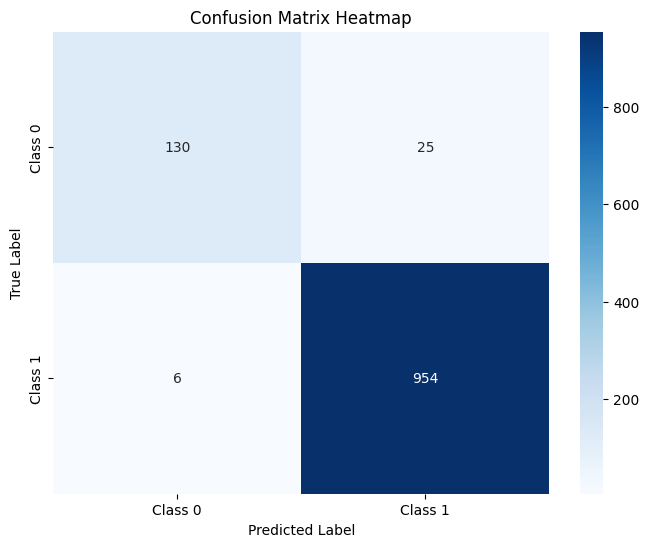

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()


ELM with K-fold for classification

In [44]:
# Load data
df = pd.read_csv('mail_data.csv')
data = df.where((pd.notnull(df)), '')

# Convert 'spam' to 0 and 'ham' to 1
data.loc[data['Category']=='spam', 'Category'] = 0
data.loc[data['Category']=='ham', 'Category'] = 1

# Split data into features and target
X = data['Message']
Y = data['Category']

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_features = tfidf_vectorizer.fit_transform(X)

# Convert labels to integers
Y = Y.astype('int')


In [47]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

class ELMClassifier:
    def __init__(self, n_hidden):
        self.n_hidden = n_hidden
        self.input_weights = None
        self.output_weights = None

    def _sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def fit(self, X, Y):
        n_samples, n_features = X.shape

        # Randomly initialize input weights
        self.input_weights = np.random.randn(n_features, self.n_hidden)

        # Compute hidden layer output
        hidden_output = self._sigmoid(X @ self.input_weights)

        # Solve for output weights using pseudoinverse
        self.output_weights = np.linalg.pinv(hidden_output) @ Y

    def predict(self, X):
        hidden_output = self._sigmoid(X @ self.input_weights)
        predicted_output = hidden_output @ self.output_weights
        # For binary classification, we can use a threshold (e.g., 0.5)
        return (predicted_output >= 0.5).astype(int)

def k_fold_cross_validation(X_train, y_train, n_hidden, n_folds=10):
    # Initialize an array to store accuracy scores
    accuracy_scores = []

    # Convert X_train to dense array to avoid ambiguity
    X_train = X_train.toarray()

    # Split the data into k folds
    fold_size = X_train.shape[0] // n_folds
    for i in range(n_folds):
        # Indices for the current fold
        start_idx = i * fold_size
        end_idx = (i + 1) * fold_size if i < n_folds - 1 else X_train.shape[0]
        test_indices = np.array(range(start_idx, end_idx)).astype(int)
        train_indices = np.array(list(np.concatenate((range(0, start_idx), range(end_idx, X_train.shape[0]))))).astype(int)

        # Split the data into train and test sets
        X_fold_train, X_fold_test = X_train[train_indices], X_train[test_indices]
        y_fold_train, y_fold_test = y_train[train_indices], y_train[test_indices]

        # Create and train the ELM classifier
        elm_classifier = ELMClassifier(n_hidden=n_hidden)
        elm_classifier.fit(X_fold_train, y_fold_train)

        # Make predictions on the test set
        y_pred = elm_classifier.predict(X_fold_test)

        # Evaluate the model
        accuracy = np.mean(y_pred == y_fold_test)
        accuracy_scores.append(accuracy)

    # Compute the average accuracy across all folds
    average_accuracy = np.mean(accuracy_scores)
    return average_accuracy

# Define range of hidden nodes to test
hidden_nodes_range = [50, 100, 150, 200, 250, 300, 400, 500, 1000]

# Initialize variables to store maximum accuracy and corresponding number of hidden nodes
max_accuracy = 0
optimal_hidden_nodes = None

# Perform k-fold cross-validation for each number of hidden nodes
for n_hidden in hidden_nodes_range:
    accuracy = k_fold_cross_validation(X_features, Y.values, n_hidden)
    if accuracy > max_accuracy:
        max_accuracy = accuracy
        optimal_hidden_nodes = n_hidden

# Print results
print("Maximum Accuracy:", max_accuracy)
print("Optimal Number of Hidden Nodes:", optimal_hidden_nodes)


Maximum Accuracy: 0.960695715290513
Optimal Number of Hidden Nodes: 1000


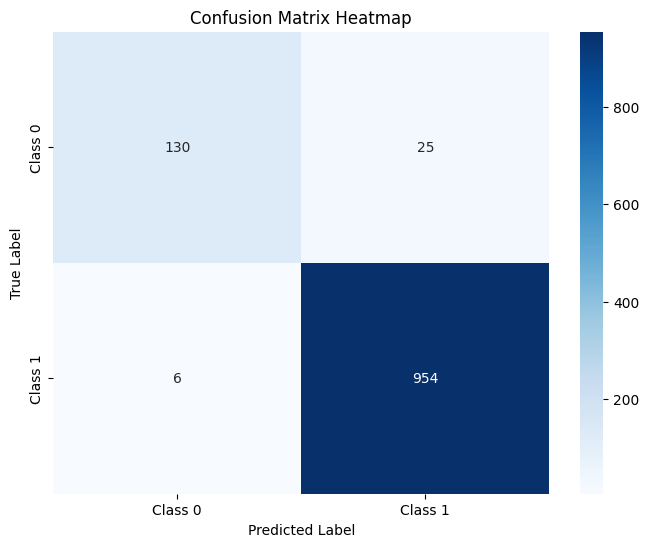

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()
